# Complexity vs layers 

In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats 
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from connalysis.network import stats as nstats
import conntility 
import sys 
sys.path.append('../../../library')
from structural_basic import load_connectome
from utils_microns_bbp import *

In [2]:
# Compute neighborhood complexity across simplices from precomputed data. This runs quickly so we compute it on the fly 
conns=["BBP", "MICrONS"]
base_graph="original"
dfs={}
for conn in conns:
    dfs[conn]=pd.read_pickle(f"../../data/props_{conn}_{base_graph}.pkl")

In [3]:
#Load connectomes
connectomes={}
#for conn in conns:
for conn in conns:
    connectomes[conn]=load_connectome("../../data", conn)
    connectomes[conn] = add_layers(connectomes[conn],conn)
    connectomes[conn].add_vertex_property("complexity_degree", dfs[conn]["wasserstein_deg_total"].to_numpy())
    connectomes[conn].add_vertex_property("complexity_simplicial", dfs[conn]["euclidean_edges_sc"].to_numpy())

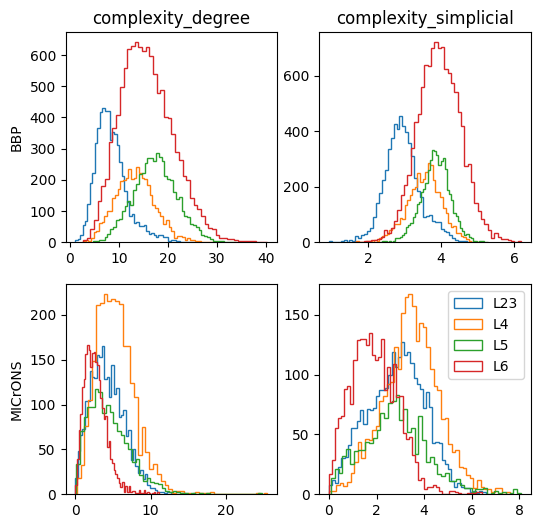

In [4]:
layers=connectomes["BBP"].vertices["layer_group"].unique()#.astype(str)
fig, axs = plt.subplots(2, 2, figsize=(6,6))
for i, conn in enumerate(conns):
    for layer in layers:
        for j, col in enumerate(["complexity_degree", "complexity_simplicial"]):
            axs[i,j].hist(connectomes[conn].vertices.query(f"layer_group=='{layer}'")[col], 
                          label=layer, histtype="step", density=False, bins=50)
            axs[0,j].set_title(col)
            
    axs[i,0].set_ylabel(conn)
axs[1,1].legend()

In [5]:
for conn in conns: 
    print(f"\n{conn}")
    display(connectomes[conn].vertices[["complexity_degree", "complexity_simplicial", "layer_group"]].groupby(by="layer_group").mean())
    


BBP


,complexity_degree,complexity_simplicial
layer_group,,
L23,8.473811,2.939608
L4,13.303858,3.542002
L5,17.390158,3.846450
L6,15.648557,3.946331



MICrONS


,complexity_degree,complexity_simplicial
layer_group,,
L23,4.251649,2.841005
L4,5.320927,3.446208
L5,4.499642,2.795843
L6,2.679877,1.911797
